Hola **Macarena**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Final: Telecomunicaciones

## Introducción

Este proyecto se realiza para le empresa de telefonía virtual CallMeMaybe; la cual pretende desarrollar una nueva función que brindará a l@s supervisores información sobre los operadores que resulten ser menos eficaces. Para considerar que un operador es ineficaz tiene que tener una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además; si un operador debe realizar llamadas salientes, un número reducido de estas también será un signo de ineficacia.
Los clientes de este servicio son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de los mismos.
Los operadores también pueden realizar llamadas internas para comunicarse entre ellos; a través de la red de CallMeMaybe.

## Objetivo

Hallar información que permita determinar cuáles son los operadores ineficaces, bajo los siguientes criterios:  
- Que un operador tenga una gran cantidad de llamadas entrantes perdidas (internas o externas).  
- Que el tiempo de espera para las llamadas entrantes sea prolongado.
- Si el operador debe realizar llamadas salientes; será ineficaz tener un número reducido de estas.

## Descripción de los datos

Contamos con 2 datasets que contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe:  
- El dataset comprimido *telecom_dataset_us.csv* contiene las siguientes columnas:
    - `user_id`: ID de la cuenta de cliente
    - `date`: fecha en la que se recuperaron las estadísticas
    - `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
    - `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
    - `operator_id`: identificador del operador
    - `is_missed_call`: si fue una llamada perdida
    - `calls_count`: número de llamadas
    - `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
    - `total_call_duration`: duración de la llamada (incluido el tiempo de espera)  
    
- El dataset *telecom_clients_us.csv* tiene las siguientes columnas:  
    - `user_id`: ID de usuario/a
    - `tariff_plan`: tarifa actual de la clientela
    - `date_start`: fecha de registro de la clientela

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, incluir esta introducción deja claro el que y cómo se realizará el proyecto
</div>

## Presentación y Dashboard

Presentación: https://drive.google.com/file/d/1V8sWEdcQVtz3ad9ibT6Ob_KeyPNDUikc/view?usp=sharing

Dashboard: https://public.tableau.com/views/ProyectofinalCallMeMaybe/DashboardOperadoresineficaces?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Es una presentación super buena y un buen trabajo con el dashboard que deja muy claro los hallazgos encontrados en el proyecto!
</div>

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Preparar los datos

In [2]:
# Cargar data de llamadas
calls = pd.read_csv('/datasets/telecom_dataset_us.csv')

In [3]:
# Cargar data de clientes
clients = pd.read_csv('/datasets/telecom_clients_us.csv')

In [4]:
calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [5]:
# Información general del dataset 'calls'
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Tenemos 117 datos nulos en la columna 'internal'.
Además, hay 8172 datos nulos en la columna 'operator_id' de modo que habría que averiguar cómo es que estos operadores no tienen su identificador.

In [6]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [7]:
# Información general del dataset 'clients'
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


No hay valores nulos

In [8]:
# Bucar filas duplicadas en 'calls'
f'Hay {calls.duplicated().sum()} duplicados explícitos en el dataset calls'

'Hay 4900 duplicados explícitos en el dataset calls'

In [9]:
# Eliminar duplicados explicitos
calls.drop_duplicates(inplace=True)

In [10]:
# Bucar filas duplicadas en 'clients'
f'Hay {clients.duplicated().sum()} duplicados en la data clients'

'Hay 0 duplicados en la data clients'

In [11]:
# Transformar la columna 'date_start' en clients a formato datetime
clients['date_start'] = clients['date_start'].astype('datetime64')

In [12]:
# Transformar la columna 'date' en calls a formato datetime
calls['date'] = pd.to_datetime(calls['date'])

In [13]:
# Extraer sólo la fecha en "calls"
calls['day'] = calls['date'].dt.date.astype('datetime64')

In [14]:
# Crear una columna para el mes
calls['month'] = calls['day'].dt.month

In [15]:
# Reemplazar valores nulos en 'operator_id'
calls['operator_id'].fillna(000000, inplace=True)

Los valores nulos son un id por lo que no podemos eliminarlos sin más; para tenerlos presentes en el análisis posterior se ha tomado 0 como un valor fácil de identificar en esta columna.

In [16]:
# Cambiar el tipo de dato de la columna 'operator_id'
calls['operator_id'] = calls['operator_id'].astype('int64')

In [17]:
# Calcular el tiempo de espera para las llamadas
calls['wait_time'] = calls['total_call_duration'] - calls['call_duration']

In [18]:
# Reemplazar valores nulos en 'internal'
calls['internal'].fillna(-1, inplace=True)

'internal' es una columna de tipo booleano por lo que los valores ausentes se reemplazaron con -1 para lograr identificarlos posteriormente en el análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada la exploración inicial y la limpieza de los datos, este paso es clave en cada análisis para que las métricas sean lo más acertadas posible
</div>

## Análisis Exploratorio de Datos

In [19]:
# Fecha de las primeras llamadas
calls['day'].min()

Timestamp('2019-08-02 00:00:00')

In [20]:
# Fecha de las últimas llamadas
calls['day'].max()

Timestamp('2019-11-28 00:00:00')

Se tiene registros de llamadas del 2019; desde el 02/Agosto hasta el 28/Noviembre 

In [21]:
calls['operator_id'].nunique()

1093

En el registro existen 1092 operadores identificados, con su ID correspondiente, y se tienen registrados con "0" todos aquellos operadores que no contenían su ID, y que se desconoce realmente a cuántos operadores corresponde pues son 8172 valores de ID ausentes.

In [22]:
# Estadísticas de las llamadas
calls.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration,month,wait_time
count,49002.000000,49002.000000,49002.000000,49002.000000,49002.000000,49002.000000,49002.000000
mean,167294.892759,777067.827068,16.462777,866.282091,1156.558202,10.192380,290.276111
std,598.558965,329773.738555,63.604098,3775.503352,4451.473661,0.852065,1132.155291
min,166377.000000,0.000000,1.000000,0.000000,0.000000,8.000000,0.000000
25%,166782.000000,890416.000000,1.000000,0.000000,46.000000,10.000000,17.000000
50%,167158.000000,906406.000000,4.000000,37.000000,208.000000,10.000000,55.000000
75%,167819.000000,929884.000000,12.000000,570.000000,901.000000,11.000000,200.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000,11.000000,46474.000000


Con las estadísticas generales del dataset es posible apreciar que tanto la duración de las llamadas, el tiempo de espera y la cantidad de llamadas que se realizan no siguen una distribución normal; fluctúan entre mínimos y máximos bien extremos, con una desviación estándar grande entre los datos.

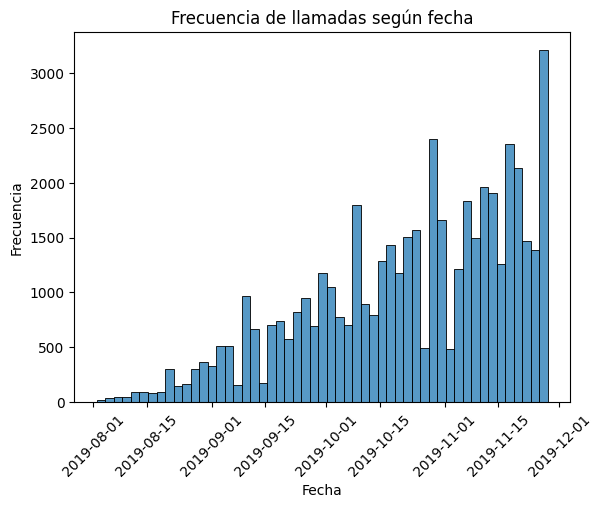

In [23]:
# Histograma; fechas de las llamadas

sns.histplot(data=calls, x='day')
plt.xticks(rotation= 45)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de llamadas según fecha')
plt.show()

Es posible observar que la cantidad de llamadas crece en el tiempo, y además; se muestra un patrón en el cual hay notorias bajadas seguidas de un peak considerable.  
El incremento de llamadas a lo largo de los meses puede relacionarse con una mayor cantidad de clientes que se han ido adquiriendo, quizá en relación también a efectivas campañas de marketing. Mientras que el patrón de disminución seguido del gran peak puede tener alguna relación con ciertos días de la semana, o días del mes; en el gráfico es posible ver que el peak es cercano al 01 de cada mes.

In [24]:
# Planes
clients['tariff_plan'].value_counts()

C    395
B    261
A     76
Name: tariff_plan, dtype: int64

Existen 3 planes para los clientes de 'CallMeMaybe'

In [25]:
# Unir data de llamadas y usuarios
calls_analytics = calls.merge(clients, how='inner', on='user_id')

In [26]:
# Clientes únicos de cada Plan
calls_analytics.groupby('tariff_plan')['user_id'].nunique()

tariff_plan
A     34
B    112
C    161
Name: user_id, dtype: int64

In [27]:
# Cantidad de llamadas por plan
tariff_calls = calls_analytics.groupby(['month', 'tariff_plan'], as_index=False)['calls_count'].sum()

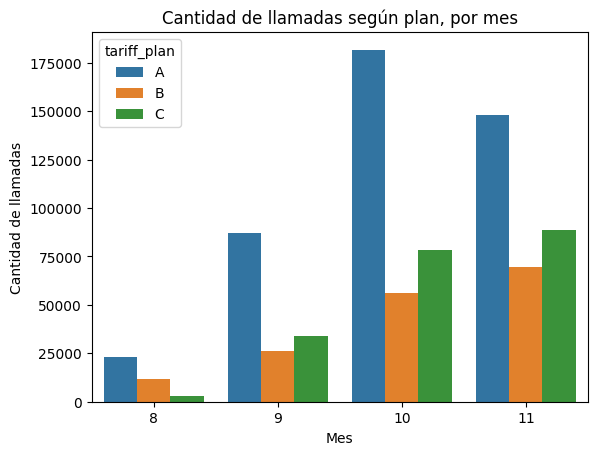

In [28]:
sns.barplot(data=tariff_calls, x='month', y='calls_count', hue='tariff_plan')
plt.title('Cantidad de llamadas según plan, por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de llamadas')
plt.show()

Si bien desde Agosto a Noviembre el plan A es del cual se realizan mayor cantidad de llamadas, éste muestra un descenso de Octubre a Noviembre, a diferencia del plan B y C que ha pesar de tener un incremento menor mes a mes (vs el plan A), se mantienen en ascenso constante en cuanto a la cantidad de llamadas durante todo el registro.
La mayor cantidad de llamadas en el plan A puede ser un punto relevante, pues es el plan con menor cantidad de clientes.

In [29]:
# Cantidad de clientes por plan
clients_plan = calls_analytics.groupby(['month', 'tariff_plan'], as_index=False)['user_id'].nunique()

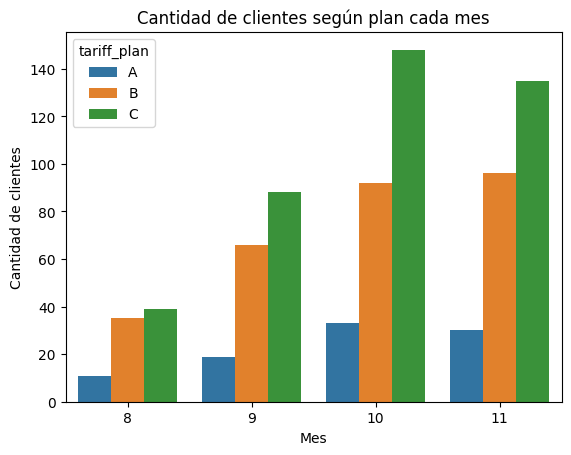

In [30]:
sns.barplot(data=clients_plan, x='month', y='user_id', hue='tariff_plan')
plt.title('Cantidad de clientes según plan cada mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de clientes')
plt.show()

El plan A es el que tiene bastante menos cantidad de clientes que los planes B y C, sin embargo es en donde más llamadas se realizan; esto puede indicar alguna falla en el servicio que ofrece esta tarifa, pues las diferencias son muy notorias respecto a los otros 2 planes.

In [31]:
# Duración promedio de llamadas según plan
duration_plan = calls_analytics.groupby(['month', 'tariff_plan'], as_index=False)['call_duration'].mean()

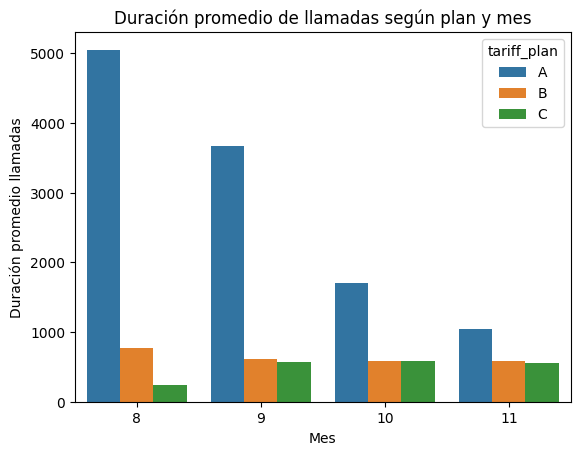

In [32]:
sns.barplot(data=duration_plan, x='month', y='call_duration', hue='tariff_plan')
plt.title('Duración promedio de llamadas según plan y mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio llamadas')
plt.show()

El plan A no sólo tiene mayor cantidad de llamadas, sino también de mayor duración en promedio; que si bien van a la baja, los planes B y C muestran una duración de las llamadas más estable a través de los meses, sin tantos cambios a diferencia de lo que se ha observado en el plan A.

In [33]:
# Tiempo de espera promedio en cada plan
wait_time_plan = calls_analytics.groupby(['month', 'tariff_plan'], as_index=False)['wait_time'].mean()

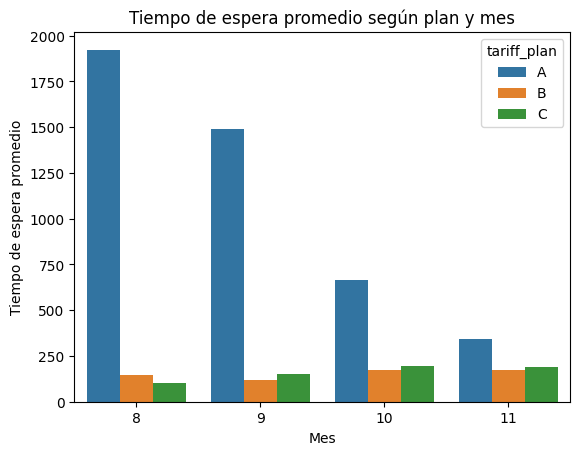

In [34]:
sns.barplot(data=wait_time_plan, x='month', y='wait_time', hue='tariff_plan')
plt.title('Tiempo de espera promedio según plan y mes')
plt.xlabel('Mes')
plt.ylabel('Tiempo de espera promedio')
plt.show()

El tiempo de espera promedio parece relacionarse con la duración promedio de las llamadas, pues en ambas variables, el plan A muestra mayor tiempo en relación a los otros 2 planes, y va en disminución en los meses siguientes.  
Es probable que un mayor número de llamadas, y la mayor duración de las mismas, genere un mayor tiempo de espera.

In [35]:
# Llamadas perdidas según plan y mes
missed_plan = calls_analytics.groupby(['month', 'tariff_plan'], as_index=False)['is_missed_call'].mean()

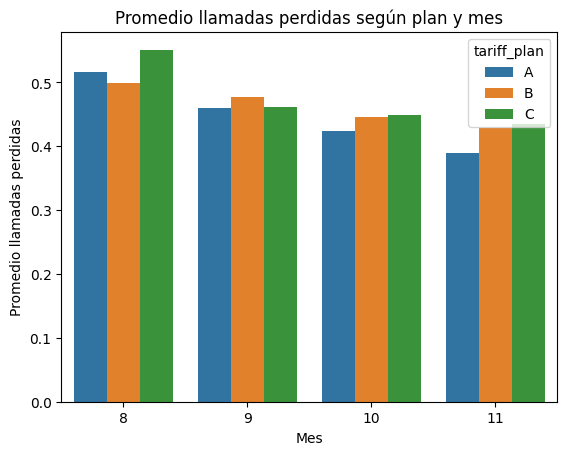

In [36]:
sns.barplot(data=missed_plan, x='month', y='is_missed_call', hue='tariff_plan')
plt.title('Promedio llamadas perdidas según plan y mes')
plt.xlabel('Mes')
plt.ylabel('Promedio llamadas perdidas')
plt.show()

En general no se muestra una gran diferencia entre cada plan durante los meses del registro; no obstante es posible observar una tendencia a la baja en la cantidad de llamadas perdidas en todos los planes, aunque es más notorio para el plan A

In [37]:
# Duración promedio de las llamadas por operador
calls_duration = calls_analytics.groupby('operator_id', as_index=False)['call_duration'].mean()
calls_duration

,operator_id,call_duration
0,0,66.749598
1,879896,545.829060
2,879898,1133.881057
3,880020,112.250000
4,880022,216.385714
...,...,...
1088,972410,944.250000
1089,972412,699.600000
1090,972460,174.000000
1091,973120,2.500000


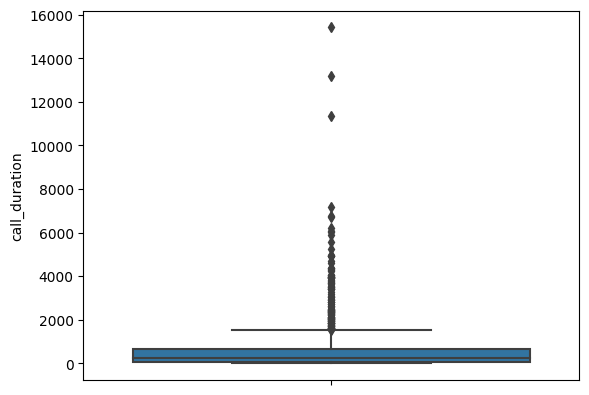

In [38]:
sns.boxplot(data=calls_duration, y='call_duration')
plt.show()

Como se había desprendido de las estadísticas generales, la duración promedio de las llamadas varía mucho entre un operador y otro, si bien la gran mayoría se concentra en menos de 200-300 minutos, los outliers son bien extremos con promedios de hasta 14000 y 16000 minutos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, bien realizado el EDA para tener más claro los datos con lo que se trabaja, además cada comentario que has dejado debajo de las gráficas facilita el entendimiento de cada paso en el análisis realizado
</div>

### Llamadas perdidas

In [39]:
# Llamadas entrantes 
calls_in = calls_analytics.query('direction == "in"')

In [40]:
# Llamadas entrantes perdidas
calls_missed = (calls_in.query('is_missed_call == True')
    .groupby('operator_id', as_index=False)['calls_count'].sum()
)
calls_missed

,operator_id,calls_count
0,0,103397
1,882680,3
2,882684,4
3,882686,6
4,882690,2
...,...,...
235,959312,7
236,960620,1
237,964510,2
238,964666,3


Se identificó a todos los operadores con id ausente como "0", de modo que es posible que estos valores nulos se relacionen con llamadas que no fueron contestadas, por la gran cantidad de ellas.  

In [41]:
# Estadisticas llamadas perdidas
calls_missed.describe()

,operator_id,calls_count
count,240.000000,240.000000
mean,917324.708333,434.679167
std,62867.049524,6674.000189
min,0.000000,1.000000
25%,904914.000000,1.000000
50%,920716.000000,2.000000
75%,937915.500000,4.000000
max,969272.000000,103397.000000


Teniendo en cuenta que el registro se tiene de 4 meses, se considerará una gran cantidad de llamadas perdidas cuando un operador tenga >= 15 llamadas no contestadas.

In [42]:
# Total de llamadas para los operadores que tienen llamadas entrantes
calls_in_count = calls_in.groupby('operator_id', as_index=False)['calls_count'].sum()

In [43]:
# Lista de operadores que tienen llamadas perdidas
operator = calls_missed['operator_id'].tolist()

In [44]:
# Filtrar operadores que tienen llamadas perdidas entrantes
filter_operator_in = calls_in_count[calls_in_count['operator_id'].isin(operator)]

In [45]:
# Unión de datos de llamadas totales, y perdidas, por operador
calls_count_missed = pd.merge(calls_in_count, calls_missed, on='operator_id')

In [46]:
# Renombrar columnas
calls_count_missed.rename(columns= {'operator_id':'operator_id', 'calls_count_x':'calls_count', 'calls_count_y':'calls_missed'}, inplace=True)

In [47]:
# Calcular % de llamadas perdidas por operador
calls_count_missed['percent'] = calls_count_missed['calls_missed'] / calls_count_missed['calls_count']

In [48]:
# Operadores con más de 15 llamadas perdidas
calls_missed_by_operator = calls_count_missed.query('calls_missed >= 15').sort_values(by='percent', ascending=False)
calls_missed_by_operator

,operator_id,calls_count,calls_missed,percent
0,0,104043,103397,0.993791
211,944226,180,30,0.166667
67,905862,102,15,0.147059
207,944216,235,24,0.102128
210,944222,185,17,0.091892
209,944220,265,18,0.067925
223,951508,336,21,0.062500
208,944218,245,15,0.061224
218,948286,319,15,0.047022
180,937956,773,24,0.031048


De momento; considerando sólo las llamadas entrantes perdidas; se hallaron estos 15 operadores con >= 15 llamadas perdidas, sin embargo considerando el % que representan estas llamadas, se identifican 3 operadores donde el % de llamadas no contestadas representa entre un 10-20%. Se añadirían 4 si se considera aquellos que tienen entre 5-10% de llamadas no contestadas.

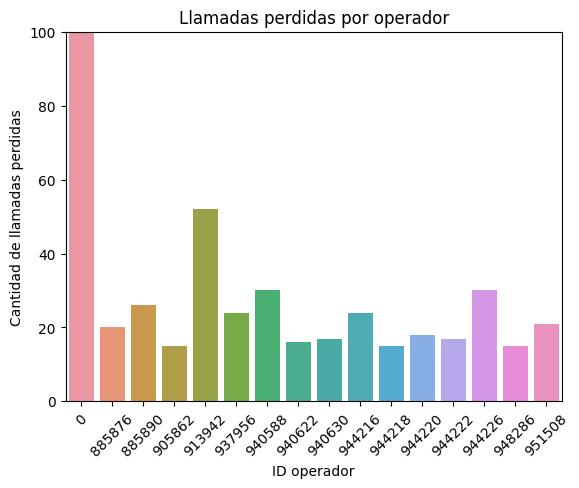

In [49]:
# Llamadas perdidas por operador
sns.barplot(data=calls_missed_by_operator, x='operator_id', y='calls_missed')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.xlabel('ID operador')
plt.ylabel('Cantidad de llamadas perdidas')
plt.title('Llamadas perdidas por operador')
plt.show()

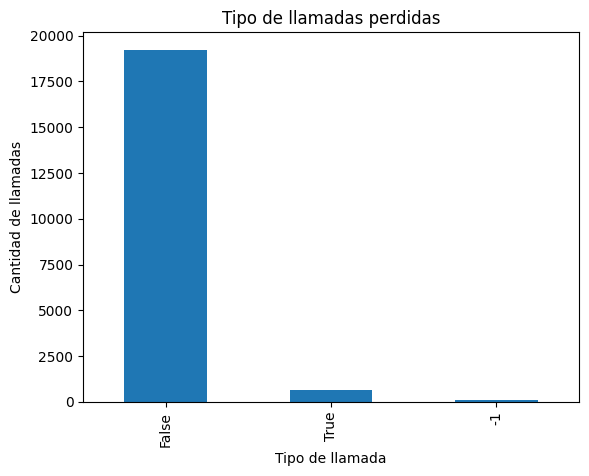

In [50]:
# Llamadas internas/externas perdidas
calls_in['internal'].value_counts().plot(
    kind='bar', 
    xlabel='Tipo de llamada', 
    ylabel='Cantidad de llamadas', 
    title='Tipo de llamadas perdidas'
)
plt.show()

La gran mayoría de las llamadas perdidas son llamadas externas, no entre los mismos operadores, de modo que este es un importante punto a mejora, pues representa una falla hacia los clientes.

### Tiempo de espera

In [51]:
# Promedio de tiempo de espera por operador
long_wait_time = calls_in.groupby('operator_id', as_index=False)['wait_time'].mean().sort_values(ascending=False, by='wait_time')

In [52]:
long_wait_time.describe()

,operator_id,wait_time
count,755.000000,755.000000
mean,922480.950993,57.766716
std,40525.301577,94.488766
min,0.000000,1.000000
25%,905093.000000,17.500000
50%,924546.000000,31.000000
75%,940457.000000,58.083333
max,973286.000000,1007.375000


In [53]:
# Tiempo de espera mayor a 5 minutos
long_wait_time_operator = long_wait_time.query('wait_time >= 300')
long_wait_time_operator

,operator_id,wait_time
338,919794,1007.375000
207,906070,889.800000
336,919790,866.803279
446,931458,681.961538
359,921318,615.418182
208,906076,611.500000
334,919552,561.757576
329,919204,550.941176
289,913938,526.974026
335,919554,503.157895


Tenemos 21 operadores que tienen un tiempo de espera superior a 5 minutos; esto puede afectar la eficacia de la atención al cliente y cómo ellos perciben el servicio, pues independiente del motivo por el cual el cliente se comunique, esperará una atención ágil.

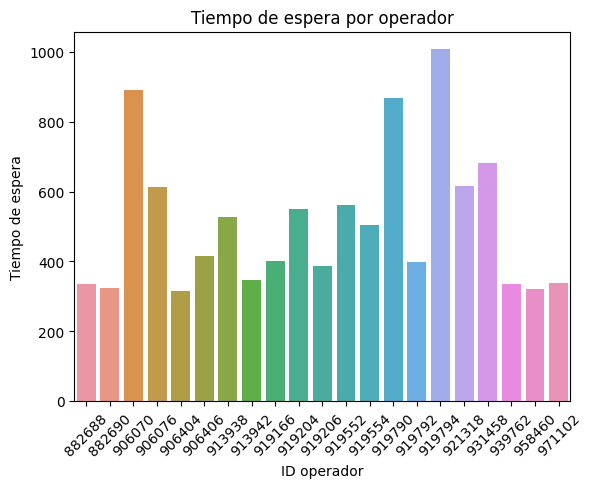

In [54]:
# 15 Operadores con gran tiempo de espera
sns.barplot(data=long_wait_time_operator, x='operator_id', y='wait_time')
plt.xticks(rotation=45)
plt.xlabel('ID operador')
plt.ylabel('Tiempo de espera')
plt.title('Tiempo de espera por operador')
plt.show()

### Llamadas salientes

In [55]:
# Llamadas salientes
calls_out = calls_analytics.query('direction == "out"')

In [56]:
# Cantidad de llamadas salientes
lowered_calls = calls_out.groupby('operator_id', as_index=False)['calls_count'].sum().sort_values(by='calls_count')
lowered_calls

,operator_id,calls_count
217,906076,1
783,954284,1
606,939698,1
782,954086,1
842,963716,1
...,...,...
256,908640,14239
447,925922,19603
467,929428,23754
25,885876,58437


In [57]:
# Estadísticas llamadas salientes
lowered_calls.describe()

,operator_id,calls_count
count,883.000000,883.000000
mean,924610.029445,689.540204
std,38632.648102,3121.188227
min,0.000000,1.000000
25%,906393.000000,11.000000
50%,924958.000000,90.000000
75%,943442.000000,591.500000
max,973120.000000,58977.000000


Se considerará un bajo número de llamadas salientes <= 10 llamadas por operador.

In [58]:
# Pocas llamadas salientes por operador
lowered_calls_by_operator = lowered_calls.query('calls_count <= 10')
lowered_calls_by_operator

,operator_id,calls_count
217,906076,1
783,954284,1
606,939698,1
782,954086,1
842,963716,1
...,...,...
777,953362,10
870,970242,10
191,904200,10
505,932798,10


Existen 214 operadores ineficientes en cuanto a escasas llamadas salientes, se mostrarán los 15 primeros para ver si se repiten ID con las muestras anteriores; llamadas perdidas y tiempo prolongado de espera.

In [59]:
# Top menor cantidad de lamadas salientes
top_lowered_calls = lowered_calls_by_operator.nsmallest(15, 'calls_count')

In [60]:
top_lowered_calls

,operator_id,calls_count
217,906076,1
783,954284,1
606,939698,1
782,954086,1
842,963716,1
776,952968,1
545,937716,1
65,891192,1
201,905480,1
544,937710,1


In [61]:
# Relación entre llamadas perdidas y tiempo de espera para llamadas
relation_by_operator = calls_analytics.groupby('operator_id', as_index=False).agg({'is_missed_call':'mean', 'wait_time':'mean'})

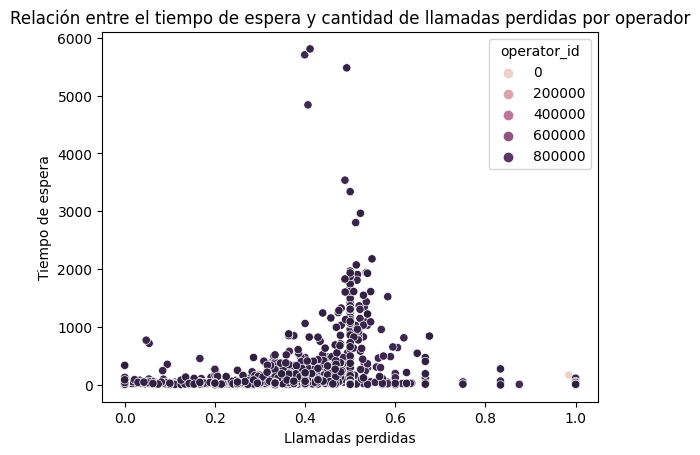

In [62]:
sns.scatterplot(data=relation_by_operator, x='is_missed_call', y='wait_time', hue='operator_id')
plt.xlabel('Llamadas perdidas')
plt.ylabel('Tiempo de espera')
plt.title('Relación entre el tiempo de espera y cantidad de llamadas perdidas por operador')
plt.show()

Si bien no hay una relación lineal directa, es posible observar una tendencia que concentra una mayor cantidad de llamadas perdidas en relación a un mayor tiempo de espera; lo cual es factible y se relacionaría con una mala experiencia para estos clientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el análisis de cada variable relacionada al proyecto, planteaste gráficas correctas con conclusiones adecuadas dejando claro cada paso de tu proyecto
</div>

## Pruebas de Hipótesis

Hipótesis: El promedio de llamadas perdidas es igual entre los operadores con gran tiempo de espera y bajo tiempo de espera

In [63]:
# H0: el promedio de llamadas perdidas es igual entre los operadores con gran tiempo de espera y bajo tiempo de espera
# H1: el promedio de llamadas perdidas es diferente entre operadores con gran tiempo de espera y bajo tiempo de espera

# Considerando que el 3er cuartil para el tiempo de espera por operador está en los 58 segundos, se considerará un gran 
# tiempo de espera sobre 1 minuto

# Dividir operadores con llamadas perdidas entre gran y bajo tiempo de espera 
high_wait_time = calls_in.query('is_missed_call == True & wait_time > 60')
low_wait_time = calls_in.query('is_missed_call == True & wait_time <= 60')

# Llamadas perdidas
high_time_missed_calls = high_wait_time['calls_count']
low_time_missed_calls = low_wait_time['calls_count']

alpha = 0.05

# significancia test Levene: 0.05
st.levene(high_time_missed_calls, low_time_missed_calls)

LeveneResult(statistic=212.12558048303504, pvalue=1.9435234296129977e-47)

Del test de Levene se obtuvo valor p= 1.9435234296129977e-47 de modo tal que el parámetro equal var para el ttest sera = False

In [64]:
# Prueba t
results = st.ttest_ind(high_time_missed_calls, low_time_missed_calls, equal_var=False)
print(results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula; la cantidad de llamadas perdidas difiere entre operadores con gran y bajo tiempo de espera')
else:
    print('No podemos rechazar la hipótesis nula; la cantidad de llamadas perdidas es igual entre operadores con gran y bajo tiempo de espera')

4.836060262882687e-31
Rechazamos la hipótesis nula; la cantidad de llamadas perdidas difiere entre operadores con gran y bajo tiempo de espera


Hipotesis: la cantidad de llamadas que tienen los operadores es igual entre los que tienen gran y bajo tiempo de espera

In [65]:
# H0: la cantidad de llamadas que tienen los operadores es igual entre los que tienen gran y bajo tiempo de espera
# H1: la cantidad de llamadas que tienen los operadores difiere entre los que tienen gran y bajo tiempo de espera

# Dividir operadores entre gran y bajo tiempo de espera 
wait_time_high = calls_analytics.query('wait_time > 60')
wait_time_low = calls_analytics.query('wait_time <= 60')

# Cantidad de llamadas
calls_count_high_time = wait_time_high['calls_count']
calls_count_low_time = wait_time_low['calls_count']

alpha = 0.05

# significancia test Levene: 0.05
st.levene(calls_count_high_time, calls_count_low_time)

LeveneResult(statistic=1888.7467450028894, pvalue=0.0)

Del test de Levene se obtuvo valor p= 1.9435234296129977e-47 de modo tal que el parámetro equal var para el ttest sera = False

In [66]:
# Prueba t
results = st.ttest_ind(calls_count_high_time, calls_count_low_time, equal_var=False)
print(results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula; la cantidad de llamadas que tienen los operadores difiere entre aquellos con gran y bajo tiempo de espera')
else:
    print('No podemos rechazar la hipótesis nula; no hay diferencia en la cantidad de llamadas que tienen los operadores con gran y bajo tiempo de espera')

0.0
Rechazamos la hipótesis nula; la cantidad de llamadas que tienen los operadores difiere entre aquellos con gran y bajo tiempo de espera


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una excelente aplicación de las pruebas de hipótesis! Siempre es importante revisar con pruebas estadísticas las métricas para poder realizar un buen argumento de las conclusiones
</div>

## Conclusiones

- Tenemos a través del registro, notables peaks y descensos en la cantidad de llamadas diarias, esto hace que exista mayor demanda en ciertos momentos, durante los cuales CallMeMaybe debería estar preparado para enfrentar este auge con mayor cantidad de operadores y otorgar una mayor respuesta hacia los usuarios, en pos de reducir el número de llamadas perdidas y largos tiempos de espera, lo cual proporciona una menor calidad en el servicio al cliente.

- Al realizar un análisis mensual por plan, fue posible observar que la tarifa A es la que tiene considerablemente mayor cantidad de llamadas, sin embargo, contiene una menor cantidad de clientes respecto a las tarifas B y C, esto sugiere un relevante aspecto a abordar, pues es posible que estos clientes presenten más dudas, requieran solicitar ayuda, o tengan algún inconveniente; de cualquier forma están esperando una respuesta por parte del servicio y es imprescindible brindar una buena atención para evitar la pérdida de estos clientes.

- Además, al visualizar la duración promedio y el tiempo de espera de las llamadas, nuevamente se encontró que el plan A tiene tiempos notablemente mayores en comparación a las tarifas B y C; lo cual puede relacionarse con la mayor demanda de llamadas y además, incrementar la baja de estos clientes que se aburren en la espera y no pronta resolución de sus solicitudes.

- Si bien es posible observar una leve tendencia a la baja en la cantidad de llamadas perdidas para todos los planes; la disminución es leve y es posible una oportunidad de mejora en este punto.

- El tiempo de espera promedio en Call Me Maybe es demasiado alto para lo que se ha documentado en este tipo de servicios (generalmente alrededor de 30 segundos) pues el promedio son 58 segundos, pero con una desviación estándar de 94 seg. Encontrándo 21 operadores con un tiempo mayor a los 5 min, lo cual mermará la conformidad del cliente con el servicio, generando mayores disgustos y aumentando la probabilidad de perder clientes.

- Las hipótesis probadas nos ayudan a entender que existen diferencias significativas entre la cantidad de llamadas que reciben y aquellas perdidas entre operadores con gran tiempo de espera vs aquellos con un tiempo de espera reducido; por lo que es de gran relevancia buscar puntos de mejora que reduzcan estos tiempos y puedan incidir a la vez en disminuir esta cantidad de llamadas no contestadas. A la vez, es posible buscar oportunidades de mejora en el servicio que logren incidir en que los clientes reduzcan su número de llamadas para que los operadores no se vean sobrepasados.

## Sugerencias

- Hacer un conglomerado de preguntas frecuentes a las cuales se les brinde respuesta en la pág web, buscando promover el "autoservicio" para que los usuarios puedan ir resolviendo sus dudas, también se podrían realizar videos explicativos/informativos sobre aquellas inquietudes que más se repiten con el fin de reducir la cantidad de llamadas por parte de los clientes y evitar colapsos en el servicio que inciden directamente en mayores tiempos de espera y posiblemente una mayor cantidad de solicitudes sin respuesta.

- Ahondar en las causas de las principales llamadas de los clientes; como fue posible observar, la cantidad de llamadas tienen considerablemente mayor frecuencia en el primer día de cada mes, quizá esto podría relacionarse con la fecha de facturación y con dudas en torno a esto por parte de los clientes, de modo que de ser el caso; se le podrían enviar avisos o recordatorios a los clientes días previos para disminuir sus inquietudes, esto podría no sólo incidir en una menor frecuencia de llamadas, sino también en la mejora de la experiencia del cliente.

- Tener operadores capacitados específicamente en las áreas de mayor duda/queja por parte de los clientes, de modo que esto permita generar un sistema omnical de "enrutamiento" de la llamada, lo cual puede disminuir el tiempo de espera para el usuario en que le respondan y luego sea dirigido con una persona que estará capacitada que podría resolver con mayor rapidez su inquietud, lo cual también puede mejorar la experiencia del cliente e ir disminuyendo el gran volumen de llamadas que puede recibir un operador.

- En relación a lo anterior; proveer una capacitación continúa a los operadores también puede contribuir en la reducción de la duración media de las llamadas, puesto que las inquietudes pueden ser resueltas con mayor eficacia.

## Referencias

Dinesh Silwal. (29/Agosto/2024). Reducción de llamadas: las mejores estrategias para reducir el volumen del centro de llamadas. KrispCall. Recuperado el 5 de enero de 2025 de https://krispcall.com/blog/call-reduction/. 
- Este artículo ayudó a comprender diferentes recoemndaciones para las empresas de telecomunicaciones que se realizan con el fin de optimizar el servicio.

(sin fecha). Análisis de las métricas: ¿cuáles KPI son importantes en un call center?. Sidial Software Cloud. Recuperado el 5 de enero de 2025 de https://sidial.cloud/es/blog-es/analisis-de-las-metricas-cuales-kpi-son-importantes-en-un-call-center/
- Con este artículo fue posible revisar que los análisis de métricas realizados fueran pertinentes.

(24/Octubre/2024). Cómo el análisis de llamadas mejora la calidad en los call centers. Numintec, a Telavox company. Recuperado el 5 de enero de 2025 de https://www.numintec.com/como-el-analisis-de-llamadas-mejora-la-calidad-en-los-call-centers/  
- Artículo que ayudó a comprender con mayor profundida cómo los dierentes aspectos de las llamadas inciden en la calidad del servicio.

Peter Alig. (26/Julio/2024). Gestión de centros de llamadas: mejores prácticas y principales KPI para mejorar las operaciones. Zendesk. Recuperado el 5 de enero de 2025 de https://www.zendesk.com/blog/call-center-management/#ImproveyourcontactcentermanagementwithZendesk  
- Artículo que ayudó a enfatizar recomendaciones pertinentes al servicio de llamadas.

Colin Mead. (20/Marzo/2024). Llamadas perdidas y cómo afectan a tu negocio. Absent Answer, Call center specialist. Recuperado el 5 de enero de 2025 de https://www.absentanswer.com/blog/cost-of-missed-calls/
- Comprender cómo las llamadas perdidas pueden relacionarse con otros factores y cómo éstas pueden mermar la experiencia del cliente.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Macarena!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas una profesional de primera en el mundo laboral.
    
Además, el dashboard le da más valor a tu proyecto ya que es una forma interactiva de compartir lo que se ha analizado. Te felicito por el gran trabajo realizado en tu proyecto.
   
Saludos!
</div>